In [1]:
import data
import torch
import torch.utils.data
import numpy as np
import gans.w_gan as wgan
import gans.w_gp_gan as wgpgan
import gans.vae as vae
import gans.ns_gan as nsgan
import gans.mm_gan as mmgan
import gans.ls_gan as lsgan
import gans.dra_gan as dragan
import gans.be_gan as began
from gans.load_data import get_data

In [ ]:
i = 0
j = 0

# Multivariate Distributions

In [ ]:
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
generator = data.Distribution(distributions[i], 200)
data_train = generator.generate_samples(50000)
data_test = generator.generate_samples(20000)
# generator.save_dist('output_file.pickle')  # Saving the generator

# Mixture Models

In [ ]:
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
pdfs = ['uniform', 'random']
generator = data.MixtureDistribution(distributions[i], distributions[j], n_mixtures=15, dim=200)
data_train = generator.generate_samples(50000)
data_test = generator.generate_samples(20000)
# generator.get_log_likelihood(data_train)
# generator.save_dist()

# Circles

In [12]:
generator = data.CirclesDatasetGenerator(size=256, n_circles=4, random_colors=True, random_sizes=True, modes=20)
x = generator.generate_samples(10000)
print(len(x))
print(x[0].shape)
# generator.generate_samples_to_directory(5000, './dataset_1')
# generator.save_generator('./generator1.pickle')

10000
(256, 256, 3)


# Piping to the GANs

In [13]:
i = 0
distributions = ['normal', 'beta', 'exponential', 'gamma', 'gumbel', 'laplace']
generator = data.Distribution(distributions[i], 200)
data_train = generator.generate_samples(50000)
data_test = generator.generate_samples(20000)

In [14]:
x_torch = torch.from_numpy(data_train)

In [15]:
dataset = torch.utils.data.TensorDataset(x_torch)

TypeError: __init__() missing 1 required positional argument: 'target_tensor'

In [2]:
# Test on MNIST
train_iter, val_iter, test_iter = get_data()

In [3]:
n = 1

# WGAN

A Jupyter Widget

Epoch[1/1], G Loss: -0.0100, D Loss: -0.8288


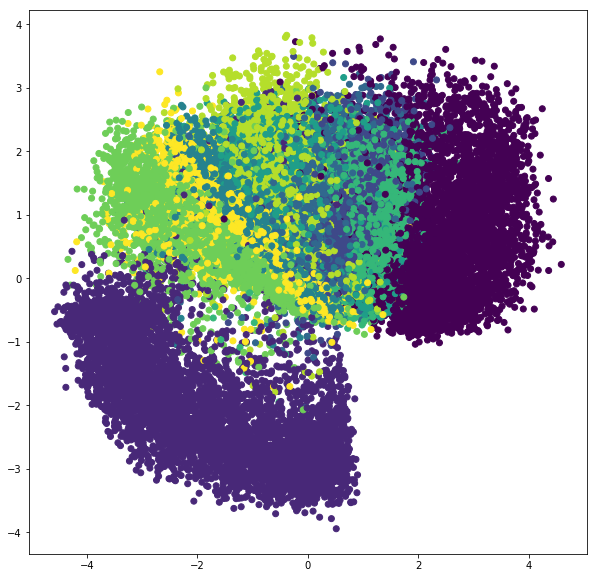

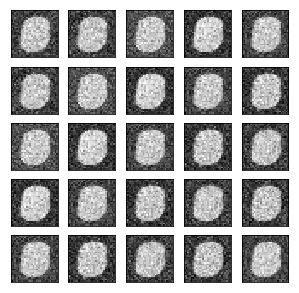

In [5]:
model = wgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 5e-5, D_lr = 5e-5, D_steps = 5, clip = 0.01)

# WGAN GP

A Jupyter Widget

Epoch[1/1], G Loss: -0.0456, D Loss: -3.3558


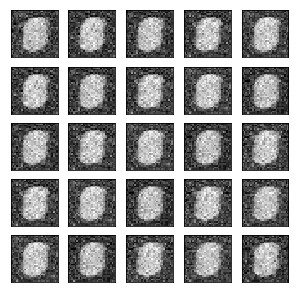

In [6]:
model = wgpgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128) 
if torch.cuda.is_available():
    model = model.cuda()
trainer = wgpgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 5)

# VAE

A Jupyter Widget

Epoch[1/1], Total Loss: 16202.0611, Reconst Loss: 14574.4594, KL Div: 1627.6016952, Val Loss: 12644.1216


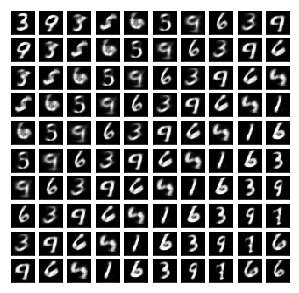

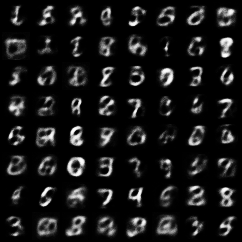

A Jupyter Widget

Epoch[1/3], Total Loss: 19076.7794, Reconst Loss: 18496.8016, KL Div: 579.9778051, Val Loss: 17136.3160


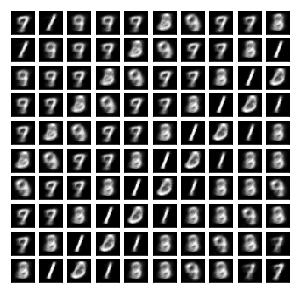

Epoch[2/3], Total Loss: 16883.9194, Reconst Loss: 16361.9527, KL Div: 521.9666571, Val Loss: 16493.1472


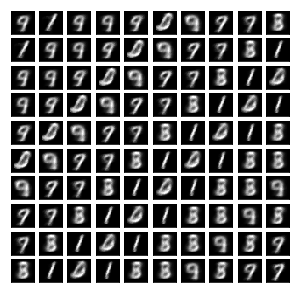

Epoch[3/3], Total Loss: 16494.8112, Reconst Loss: 15963.9237, KL Div: 530.8875271, Val Loss: 16236.2130


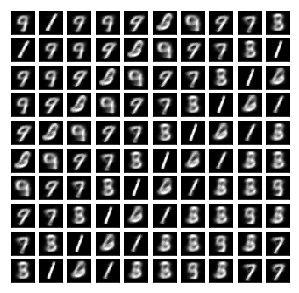

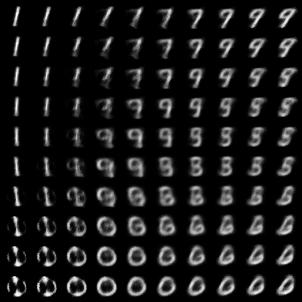

In [4]:
model = vae.VAE(image_size = 784, hidden_dim = 400, z_dim = 20)
if torch.cuda.is_available():
    model.cuda()
trainer = vae.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model, num_epochs = n)

# Explore latent space
viz = vae.Viz(train_iter, val_iter, test_iter, model)
viz.make_all()

# NS GAN

A Jupyter Widget

Epoch[1/1], G Loss: 2.4887, D Loss: 0.4108


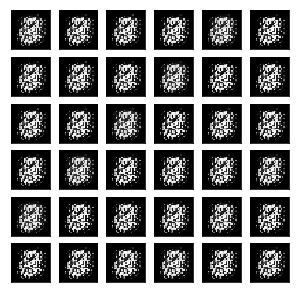

In [7]:
model = nsgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = nsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, D_steps = 1)

# MM GAN

G pre-trained for 5 training steps.


/Users/heart/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


A Jupyter Widget

Epoch[1/1], G Loss: -0.0796, D Loss: 0.3111


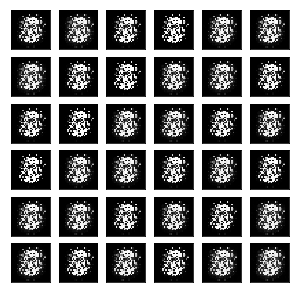

In [8]:
model = mmgan.GAN(image_size = 784, hidden_dim = 400, z_dim = 100)
if torch.cuda.is_available():
    model = model.cuda()
trainer = mmgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 2e-4, D_lr = 2e-4, G_init = 5, D_steps = 1)

# LS GAN

A Jupyter Widget

Epoch[1/1], G Loss: 0.3760, D Loss: 0.0586


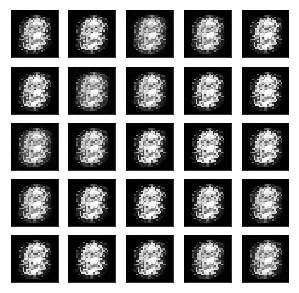

In [9]:
model = lsgan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = lsgan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# DRA GAN

A Jupyter Widget

Epoch[1/1], G Loss: 1.1945, D Loss: 7.6503


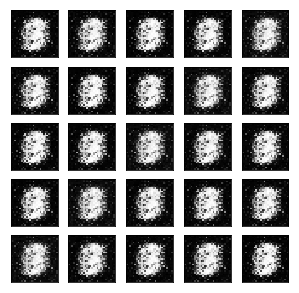

In [10]:
model = dragan.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = dragan.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)

# BE GAN

A Jupyter Widget

Epoch[1/1], G Loss: 0.3148, D Loss: 0.1684, K: 0.0000, Convergence Measure: 0.2294


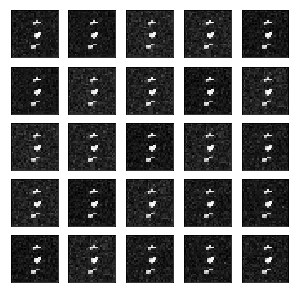

In [11]:
model = began.GAN(image_size = 784, hidden_dim = 256, z_dim = 128)
if torch.cuda.is_available():
    model = model.cuda()
trainer = began.Trainer(train_iter, val_iter, test_iter)
model = trainer.train(model = model, num_epochs = n, G_lr = 1e-4, D_lr = 1e-4, D_steps = 1)